In [20]:
import numpy as np

import sys
sys.path.append('..')

import nibabel as nib
from matplotlib import pyplot as plt

from data_generation.augment import augment_data

In [21]:
def slice_it(arr, inds):
    return arr[inds[0][0]:inds[0][1], inds[1][0]: inds[1][1], inds[2][0]:inds[2][1]]

In [28]:
vol = nib.load('../../../../data/brain/FR_FSE/2/volume.nii')
mask = nib.load('../../../../data/brain/FR_FSE/2/truth.nii')
vol.shape

(512, 512, 22)

In [29]:
patch_corner = [70, 70, 30]
patch_shape = [128,128,48]
data_range = [(start, start + size) for start, size in zip(patch_corner, patch_shape)]
data_range

[(70, 198), (70, 198), (30, 78)]

In [30]:
truth_index = 2
truth_size = 1
truth_range = data_range[:2] + [(patch_corner[2] + truth_index,
                                patch_corner[2] + truth_index + truth_size)]
truth_range

[(70, 198), (70, 198), (32, 33)]

# Gaussian Filter

In [31]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _,_ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           gaussian_filter={
            'max_sigma': 1.5,
            'prob': 1,
        }, poisson_noise=1)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

/home/bella/anaconda2/envs/keras_tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


IndexError: index 2 is out of bounds for axis 2 with size 0

<Figure size 1152x1008 with 0 Axes>

# Shot Noise

In [32]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           poisson_noise=0.5)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

IndexError: index 2 is out of bounds for axis 2 with size 0

<Figure size 1152x1008 with 0 Axes>

# contrast deviation

0.0 4730.0


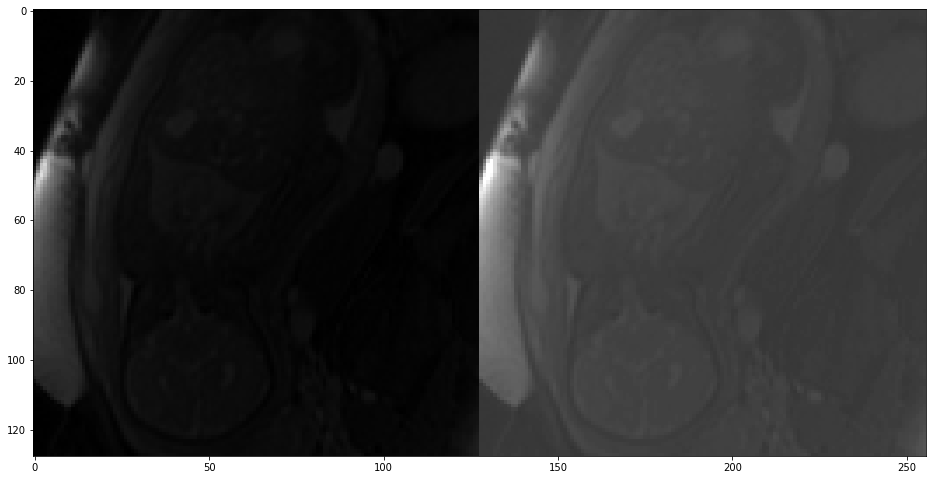

In [8]:
data = vol.get_fdata()
truth = mask.get_fdata()
print(data.min(), data.max())
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           contrast_deviation={'min_factor': 0.3, 'max_factor': 0.7})
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

# intensity_multiplication_range

In [19]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           intensity_multiplication_range=[0.2, 1.8])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

IndexError: index 2 is out of bounds for axis 2 with size 0

<Figure size 1152x1008 with 0 Axes>

# piecewise_affine

In [13]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           piecewise_affine={'scale': 0.5})
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

IndexError: index 2 is out of bounds for axis 2 with size 0

<Figure size 1152x1008 with 0 Axes>

# elastic_transform

In [15]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           elastic_transform={'alpha': 5, 'sigma': 1})
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

IndexError: index 2 is out of bounds for axis 2 with size 0

<Figure size 1152x1008 with 0 Axes>

# scale_deviation

In [ ]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           scale_deviation=[0.1, 0.1, 0.0])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

# rotate

In [18]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                                rotate_deviation=[0, 0, 1800])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

#print(slice_it(truth, truth_range).shape)
#print(truth2.shape)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0]], cmap='gray')

IndexError: index 2 is out of bounds for axis 2 with size 0

<Figure size 1152x1008 with 0 Axes>

# Flip

In [9]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                                flip=[0, 0, 1])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

#print(slice_it(truth, truth_range).shape)
#print(truth2.shape)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0]], cmap='gray')

ValueError: too many values to unpack (expected 3)

# Translate

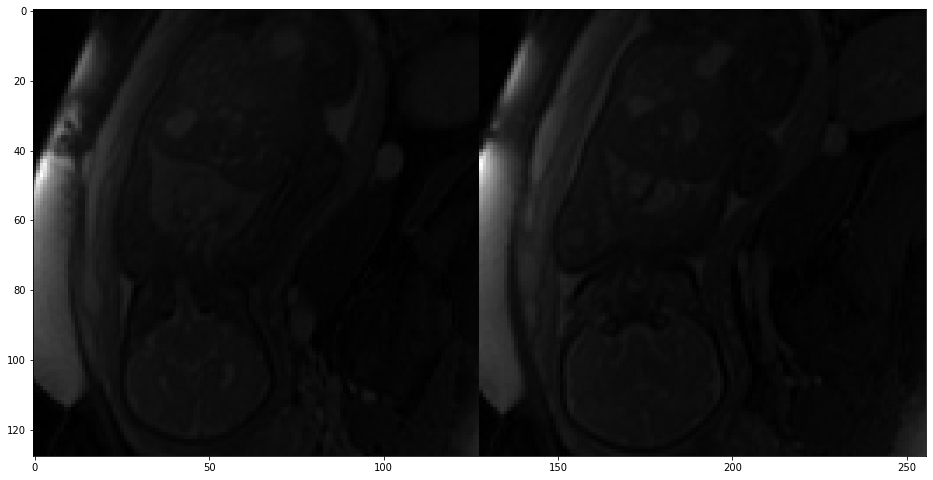

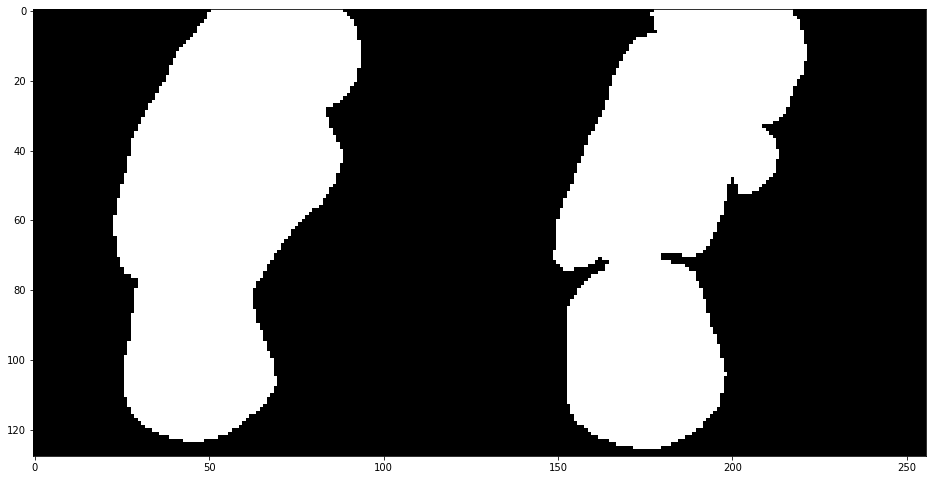

In [21]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                                translate_deviation=[0, 0, 10])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

#print(slice_it(truth, truth_range).shape)
#print(truth2.shape)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0]], cmap='gray')

In [ ]:
z_trans = 9

data_range2 = data_range.copy()
data_range2[-1] = np.add(data_range2[-1], z_trans)

plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range2)[..., 2], data2[..., 2]], cmap='gray')

truth_range2 = truth_range
truth_range2[-1] = np.add(truth_range2[-1], z_trans)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range2)[..., 0], truth2[..., 0]], cmap='gray')